In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [149]:
# settings
graphFontSizeLarge = False
parameter = 128
sample = 1
spec = False

In [150]:
if graphFontSizeLarge:
    labelSize, legendSize, tickSize = 30, 30, 24
else:
    labelSize, legendSize, tickSize = 18, 18, 12

if parameter == 128:
    ylim = 3
elif parameter == 192:
    ylim = 5
else:
    ylim = 1

In [151]:

filename = f'benchmark_results_spec_{parameter}_{sample}.csv' if spec else f'benchmark_results_{parameter}_{sample}.csv'

df = pd.read_csv(f'../data/{filename}')
df["ratio"] = df["map_num"] / df["DBL_num"]

In [152]:
min_cycle_row = df.loc[df["execution_time"].idxmin()]
print(min_cycle_row)

h_threshold          0.000000
scale                0.000000
execution_time       1.433000
point_memory         5.000000
map_num           2074.000000
DBL_num           6430.000000
ratio                0.322551
Name: 0, dtype: float64


In [153]:
if spec == False:
    min_point_memory = df['point_memory'].min()
    min_cycle_row = df.loc[df[df['point_memory'] == min_point_memory]['execution_time'].idxmin()]
    print(min_cycle_row)

h_threshold          1.000000
scale                5.750000
execution_time       1.588000
point_memory         4.000000
map_num           1820.000000
DBL_num           8386.000000
ratio                0.217028
Name: 106, dtype: float64


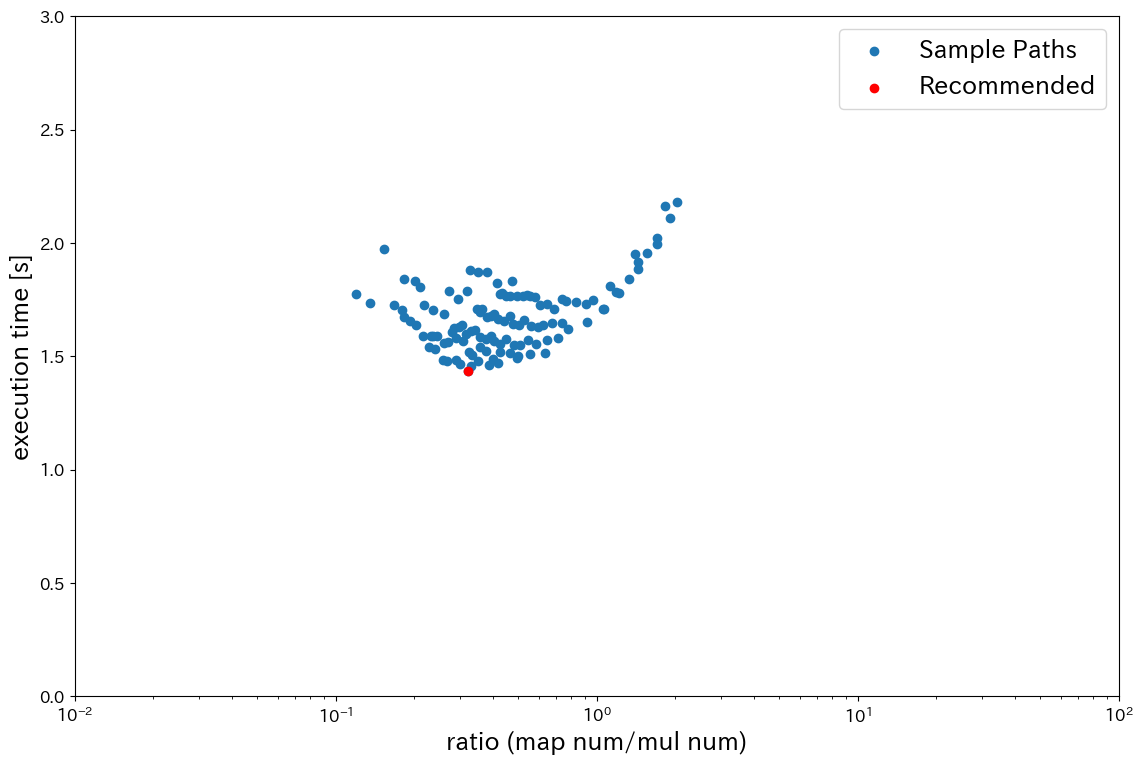

In [154]:
fig = plt.figure(facecolor="w",figsize=(12,8))
ax1 = fig.add_subplot(111)

scatter = ax1.scatter(df["ratio"], df["execution_time"], label="Sample Paths")
scatter = ax1.scatter([df["ratio"][0]], [df["execution_time"][0]], c="red", label="Recommended")

ax1.set_xscale('log')
ax1.set_xlabel("ratio (map num/mul num)", fontsize=labelSize)
ax1.set_ylabel("execution time [s]", fontsize=labelSize)
ax1.legend(fontsize=legendSize)
plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)

ax1.set_xlim(1e-2, 1e2)
ax1.set_ylim(0, ylim)

plt.subplots_adjust(left=0.1, right=0.97, bottom=0.13, top=0.98)
fig.savefig("../images/strategy-ratio-execution_time.png")

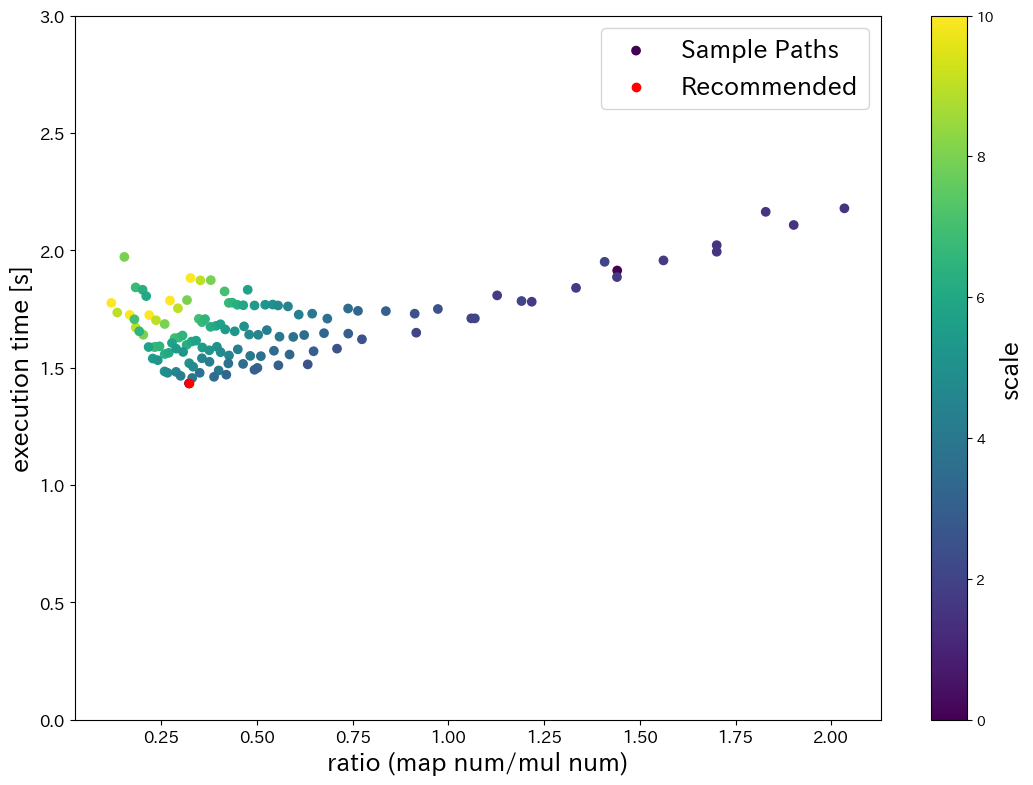

In [155]:
if spec == False:
    fig = plt.figure(facecolor="w",figsize=(12,8))
    ax1 = fig.add_subplot(111)

    scatter = ax1.scatter(df["ratio"], df["execution_time"], c=df["scale"], label="Sample Paths")
    cbar = plt.colorbar(scatter)
    cbar.set_label("scale", fontsize=labelSize)
    scatter = ax1.scatter([df["ratio"][0]], [df["execution_time"][0]], c="red", label="Recommended")

    ax1.set_xlabel("ratio (map num/mul num)", fontsize=labelSize)
    ax1.set_ylabel("execution time [s]", fontsize=labelSize)
    ax1.legend(fontsize=legendSize)
    plt.xticks(fontsize=tickSize)
    plt.yticks(fontsize=tickSize)

    ax1.set_ylim(0, ylim)

    plt.subplots_adjust(left=0.16, right=1, bottom=0.1, top=0.98)
    fig.savefig("../images/strategy-ratio-execution_time-scale-grad.png")

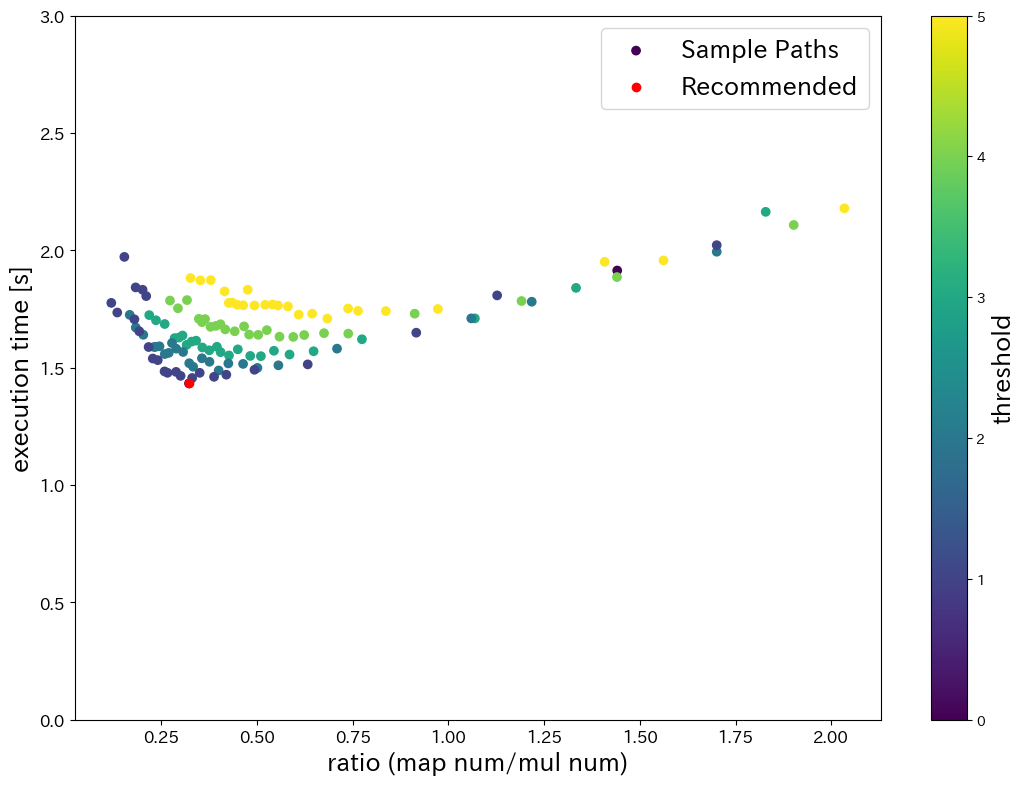

In [156]:
if spec == False:
    fig = plt.figure(facecolor="w",figsize=(12,8))
    ax1 = fig.add_subplot(111)

    scatter = ax1.scatter(df["ratio"], df["execution_time"], c=df["h_threshold"], label="Sample Paths")
    cbar = plt.colorbar(scatter)
    cbar.set_label("threshold", fontsize=labelSize)
    scatter = ax1.scatter([df["ratio"][0]], [df["execution_time"][0]], c="red", label="Recommended")

    ax1.set_xlabel("ratio (map num/mul num)", fontsize=labelSize)
    ax1.set_ylabel("execution time [s]", fontsize=labelSize)
    ax1.legend(fontsize=legendSize)
    plt.xticks(fontsize=tickSize)
    plt.yticks(fontsize=tickSize)

    ax1.set_ylim(0, ylim)

    plt.subplots_adjust(left=0.16, right=1, bottom=0.1, top=0.98)
    fig.savefig("../images/strategy-ratio-execution_time-threshold-grad.png")

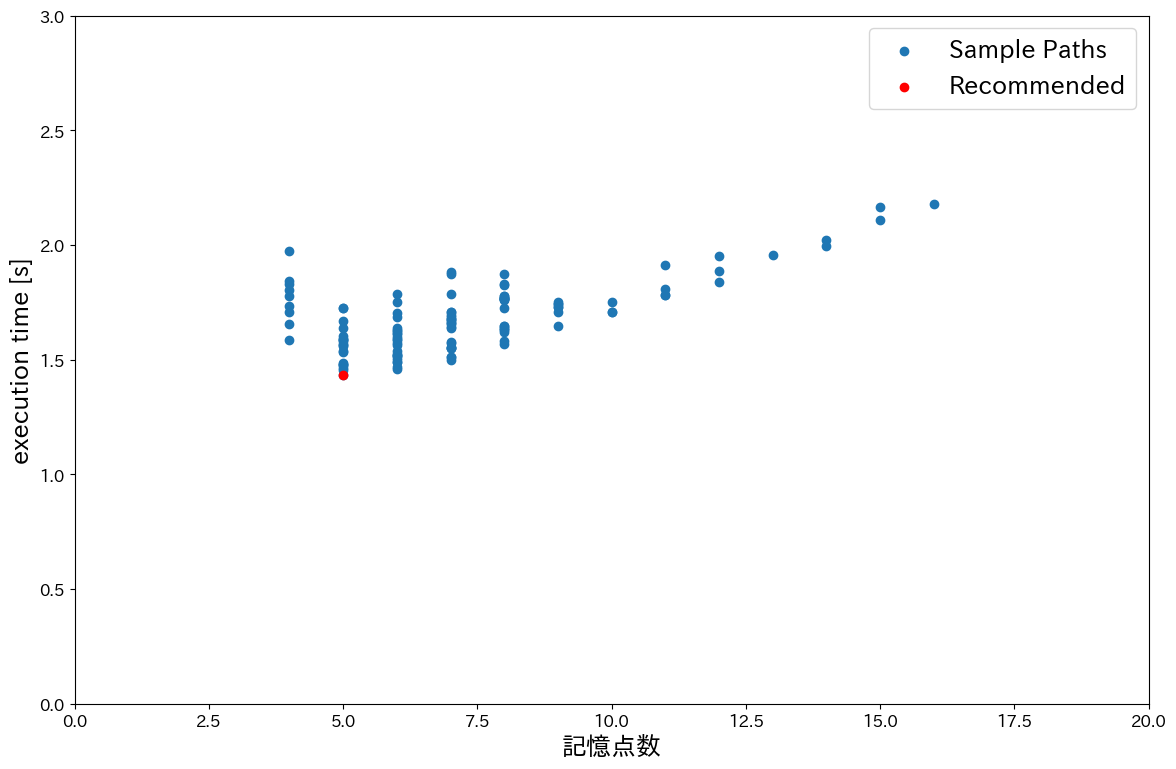

In [157]:
if spec == False:
    fig = plt.figure(facecolor="w",figsize=(12,8))
    ax1 = fig.add_subplot(111)

    scatter = ax1.scatter(df["point_memory"], df["execution_time"], label="Sample Paths")
    scatter = ax1.scatter([df["point_memory"][0]], [df["execution_time"][0]], c="red", label="Recommended")

    ax1.set_xlim(0, 20)
    ax1.set_ylim(0, ylim)
    ax1.set_xlabel("記憶点数", fontsize=labelSize)
    ax1.set_ylabel("execution time [s]", fontsize=labelSize)
    ax1.legend(fontsize=legendSize)
    plt.xticks(fontsize=tickSize)
    plt.yticks(fontsize=tickSize)

    plt.subplots_adjust(left=0.1, right=0.995, bottom=0.12, top=0.98)
    fig.savefig("../images/strategy-memory-execution_time-overview.png")